In [129]:
from ipynb.fs.full.Preprocessing import ReturnData,getData
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import time

We are going to use the ReturnData() function from the Preprocessing file to get our data which is already split.

In [130]:

allData = ReturnData()

TrainX = allData[0][0]
TrainY = allData[0][1]

ValidationX = allData[1][0]
ValidationY = allData[1][1]

TestX = allData[2][0]
TestY = allData[2][1]

Creating a design matrix where the first column will be the bias for each feature all represented by 1

In [131]:
start = time.time()
def DesignMatrix(data):
    
    row,col = np.shape(data)
    designmat = np.empty((row,col+1))
    designmat[:,0] = 1
    for i in range(col):
        designmat[:,i+1] = data[:,i]
    
    return designmat

TrainDM = DesignMatrix(TrainX)

We create a function which will randomly generate a vector of weights of a certain size

In [132]:
def Weights(size):
    Θ = np.random.uniform(-0.5,0.5,size)
    
    return Θ

## We have 4 Classes so we will have to generate 4 weight vectors to represent each class

Θ1 = Weights(7)
Θ2 = Weights(7) 
Θ3 = Weights(7)
Θ4 = Weights(7)
weights = [Θ1,Θ2,Θ3,Θ4]
initial  = np.copy(weights)
w2 = np.copy(weights)
w3 = np.copy(weights)
w4 = np.copy(weights)

We are going to define the sigmoid function

In [133]:
def sigmoid(x):
    y = 1/(1+np.exp(-1*x))
    return y

def softmax(x,weights,index):
    
    numerator = np.exp(np.dot(x,weights[index]))
    n = len(weights)
    denominator = 0
    for i in range(n):
        denominator += np.exp(np.dot(x,weights[i]))
        
    softmax = numerator/denominator
    return softmax



We are now going to implement Gradient Descent

In [134]:
def GradientDescent(Yvals,weights,DM,α,ϵ,maxIterations):
    Θold1 = np.zeros(7)
    Θold2 = np.zeros(7)
    Θold3 = np.zeros(7)
    Θold4 = np.zeros(7)
    c1 = 1
    c2 = 1
    c3 = 1
    c4 = 1
    count = 0 
    numClasses = len(weights)
    length = np.shape(DM)[0]
    while(count<maxIterations and(c1>ϵ or c2>ϵ or c3>ϵ or c4>ϵ ) ):
        count+=1
        Θold1 = np.copy(weights[0])
        Θold2 = np.copy(weights[1])
        Θold3 = np.copy(weights[2])
        Θold4 = np.copy(weights[3])
        
        for i in range(numClasses):
            y = -1
            for j in range(length):
                if(Yvals[j]==i):
                    y = 1
                else:
                    y = 0
        
                weights[i] = weights[i]+α*((y-sigmoid(np.dot(DM[i],weights[i])))*DM[i])
                #weights[i] = weights[i]+α*((y-softmax(DM[i],weights,i))*DM[i])
               
        c1 = np.linalg.norm(weights[0] - Θold1)
        c2 = np.linalg.norm(weights[1] - Θold2)
        c3 = np.linalg.norm(weights[2] - Θold3)
        c4 = np.linalg.norm(weights[3] - Θold4)
    
    return weights


w = GradientDescent(TrainY,weights,TrainDM,0.01,0.000000005,1000)

In [135]:
def ConfusionMatrix(Actual,Predicted,numClasses):
    
    confusion = np.zeros((numClasses,numClasses))
    
    for i in range(len(Actual)):
        
          confusion[Predicted[i]][Actual[i]]+=1
    
    accuracy = (np.sum(np.diag(confusion))/np.sum(confusion))*100
    return confusion,accuracy

In [136]:
def Prediction(weights,DM):
    
    pred = []
    n = np.shape(DM)[0]
    l = len(weights)
    for i in range(n):
        p =[]
        x = DM[i]
        for j in range(l):
            p.append(softmax(x,weights,j))
            
        pred.append(p)
        
    final = []
    for p in pred:

        final.append(p.index(max(p)))
        
    return final
Pred = Prediction(w,TrainDM)
end = time.time()

In [137]:
ans = Prediction(initial,TrainDM)

initConfusion = ConfusionMatrix(TrainY,ans,4)

print("The Training Confusion Matrix prior to the weight update is:\n",initConfusion[0],"\n")
print("The accuracy is:",initConfusion[1],"%")

The Training Confusion Matrix prior to the weight update is:
 [[ 66.   5.   7.   0.]
 [ 45.   0.   0.   0.]
 [583. 219.  33.  41.]
 [ 37.   1.   0.   0.]] 

The accuracy is: 9.546769527483125 %


In [138]:
mt = ConfusionMatrix(TrainY,Pred,4)

print("The Training Confusion Matrix is:\n",mt[0],"\n")
print("The accuracy is:",mt[1],"%\n")
print("The Time taken is:",end-start)

The Training Confusion Matrix is:
 [[684. 225.  40.  41.]
 [ 47.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]] 

The accuracy is: 65.95949855351977 %

The Time taken is: 0.26281094551086426


In [139]:
VDM = DesignMatrix(ValidationX)
P = Prediction(w,VDM)
vm = ConfusionMatrix(ValidationY,P,4)

print("The Validation Confusion Matrix is:\n",vm[0],"\n")
print("The accuracy is:",vm[1],"%")

The Validation Confusion Matrix is:
 [[216.  86.  15.  13.]
 [ 16.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]] 

The accuracy is: 62.42774566473989 %


In [140]:
w2 = GradientDescent(TrainY,w2,TrainDM,0.001,0.00000000005,1000)
P2 = Prediction(w2,VDM)
vm2 = ConfusionMatrix(ValidationY,P2,4)

print("The Validation Confusion Matrix is:\n",vm2[0],"\n")
print("The accuracy is:",vm2[1],"%")

The Validation Confusion Matrix is:
 [[197.  86.  15.  13.]
 [ 35.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]] 

The accuracy is: 56.936416184971094 %


In [141]:
w3 = GradientDescent(TrainY,w3,TrainDM,0.0000000000000000001,0.005,1000)
P3 = Prediction(w3,VDM)
vm3 = ConfusionMatrix(ValidationY,P3,4)
print("The Validation Confusion Matrix is:\n",vm3[0],"\n")
print("The accuracy is:",vm3[1],"%")

The Validation Confusion Matrix is:
 [[ 16.   2.   3.   0.]
 [ 18.   0.   0.   0.]
 [192.  84.  12.  13.]
 [  6.   0.   0.   0.]] 

The accuracy is: 8.092485549132949 %


In [142]:
w4 = GradientDescent(TrainY,w4,TrainDM,0.000000001,0.005,1000)
P4 = Prediction(w4,VDM)
vm4 = ConfusionMatrix(ValidationY,P4,4)
print("The Validation Confusion Matrix is:\n",vm4[0],"\n")
print("The accuracy is:",vm4[1],"%")

The Validation Confusion Matrix is:
 [[ 16.   2.   3.   0.]
 [ 18.   0.   0.   0.]
 [192.  84.  12.  13.]
 [  6.   0.   0.   0.]] 

The accuracy is: 8.092485549132949 %


It is clear from the above that the best values for alpha and epsilon are 0.01 and 0.000000005 respectively.

In [143]:
TDM = DesignMatrix(TestX)
PT = Prediction(w,TDM)
tm = ConfusionMatrix(TestY,PT,4)

print("The Testing Confusion Matrix is:\n",tm[0],"\n")
print("The accuracy is:",tm[1],"%\n")
print("The Precision is:",metrics.precision_score(PT,TestY.astype('int'),average=None)*100,"%\n")
print("The Recall is:",metrics.recall_score(PT,TestY.astype('int'),average=None)*100,"%\n")

The Testing Confusion Matrix is:
 [[230.  73.  14.  11.]
 [ 17.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]] 

The accuracy is: 66.66666666666666 %

The Precision is: [93.11740891  0.          0.          0.        ] %

The Recall is: [70.12195122  0.          0.          0.        ] %



/home/yaseen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


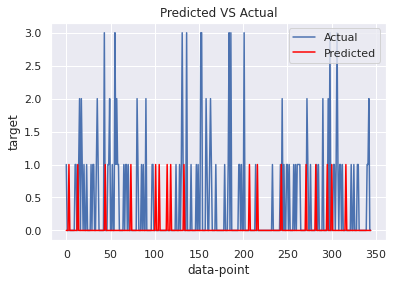

In [144]:
plt.plot(np.arange(len(TestY)),TestY,label = "Actual")
plt.plot(np.arange(len(TestY)),PT,label = "Predicted",color="red")
plt.xlabel("data-point")
plt.ylabel("target")
plt.title("Predicted VS Actual")
plt.legend(loc = 'upper right')
plt.show()
plt.close()